In [1]:
"""
Created on Wed Oct 19 19:33:27 2022

@author:Brandon Botzer - btb5103

Data Set Information:
    
    Data Set Information:

There are 10 predictors, all quantitative, and a binary dependent variable, 
indicating the presence or absence of breast cancer.
The predictors are anthropometric data and parameters which can be gathered 
in routine blood analysis.
Prediction models based on these predictors, if accurate, 
can potentially be used as a biomarker of breast cancer.

Attribute Information:

Quantitative Attributes:
Age (years)
BMI (kg/m2)
Glucose (mg/dL)
Insulin (µU/mL)
HOMA
Leptin (ng/mL)
Adiponectin (µg/mL)
Resistin (ng/mL)
MCP-1(pg/dL)

Labels:
1=Healthy controls
2=Patients


Citation Request:

This dataset is publicly available for research. The details are 
described in [Patricio, 2018].

Please include this citation if you plan to use this database:
[Patricio, 2018] Patrício, M., Pereira, J., Crisóstomo, J., Matafome, P., Gomes, M., Seiça, R., & Caramelo, F. (2018). Using Resistin, glucose, age and BMI to predict the presence of breast cancer. BMC Cancer, 18(1). [Web Link]
"""



"""
Assignment:
    
    There are 10 predictors, all quantitative, and a binary dependent variable, 
    indicating the presence or absence of breast cancer. The predictors are 
    anthropometric data and parameters which can be gathered in routine blood 
    analysis. Prediction models based on these predictors, 
    if accurate, can potentially be used as a biomarker of breast cancer.
    
    
    
    
    1. Explore the Breast Cancer Data (10 points)
    2. Build and evaluate SCV models with different kernel function (40 points)
    3. Find the best n_estimator for Random Forests model (25 points)
    4. Find the best n_estimatro for Adaboost model (25 points)

"""

'\nAssignment:\n    \n    There are 10 predictors, all quantitative, and a binary dependent variable, \n    indicating the presence or absence of breast cancer. The predictors are \n    anthropometric data and parameters which can be gathered in routine blood \n    analysis. Prediction models based on these predictors, \n    if accurate, can potentially be used as a biomarker of breast cancer.\n    \n    \n    \n    \n    1. Explore the Breast Cancer Data (10 points)\n    2. Build and evaluate SCV models with different kernel function (40 points)\n    3. Find the best n_estimator for Random Forests model (25 points)\n    4. Find the best n_estimatro for Adaboost model (25 points)\n\n'

In [2]:
#Imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

#Used for keeping time
import time


#0. Import the data

#Set the path for the CSV file
readPath = "J:\DSDegree\PennState\DAAN_862\Week 10\Homework"

#Change the directory
os.chdir(readPath)

#Read the CSV file in
df = pd.read_csv("dataR2.csv")

I will perform some exploration of the Breast Cancer data.


General formating of the data frame:
              Age         BMI     Glucose     Insulin        HOMA      Leptin  \
count  116.000000  116.000000  116.000000  116.000000  116.000000  116.000000   
mean    57.301724   27.582111   97.793103   10.012086    2.694988   26.615080   
std     16.112766    5.020136   22.525162   10.067768    3.642043   19.183294   
min     24.000000   18.370000   60.000000    2.432000    0.467409    4.311000   
25%     45.000000   22.973205   85.750000    4.359250    0.917966   12.313675   
50%     56.000000   27.662416   92.000000    5.924500    1.380939   20.271000   
75%     71.000000   31.241442  102.000000   11.189250    2.857787   37.378300   
max     89.000000   38.578759  201.000000   58.460000   25.050342   90.280000   

       Adiponectin    Resistin        MCP.1  Classification  
count   116.000000  116.000000   116.000000      116.000000  
mean     10.180874   14.725966   534.647000     

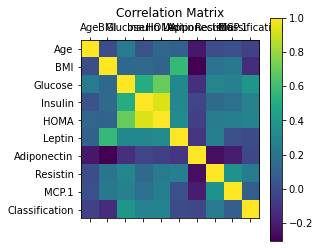

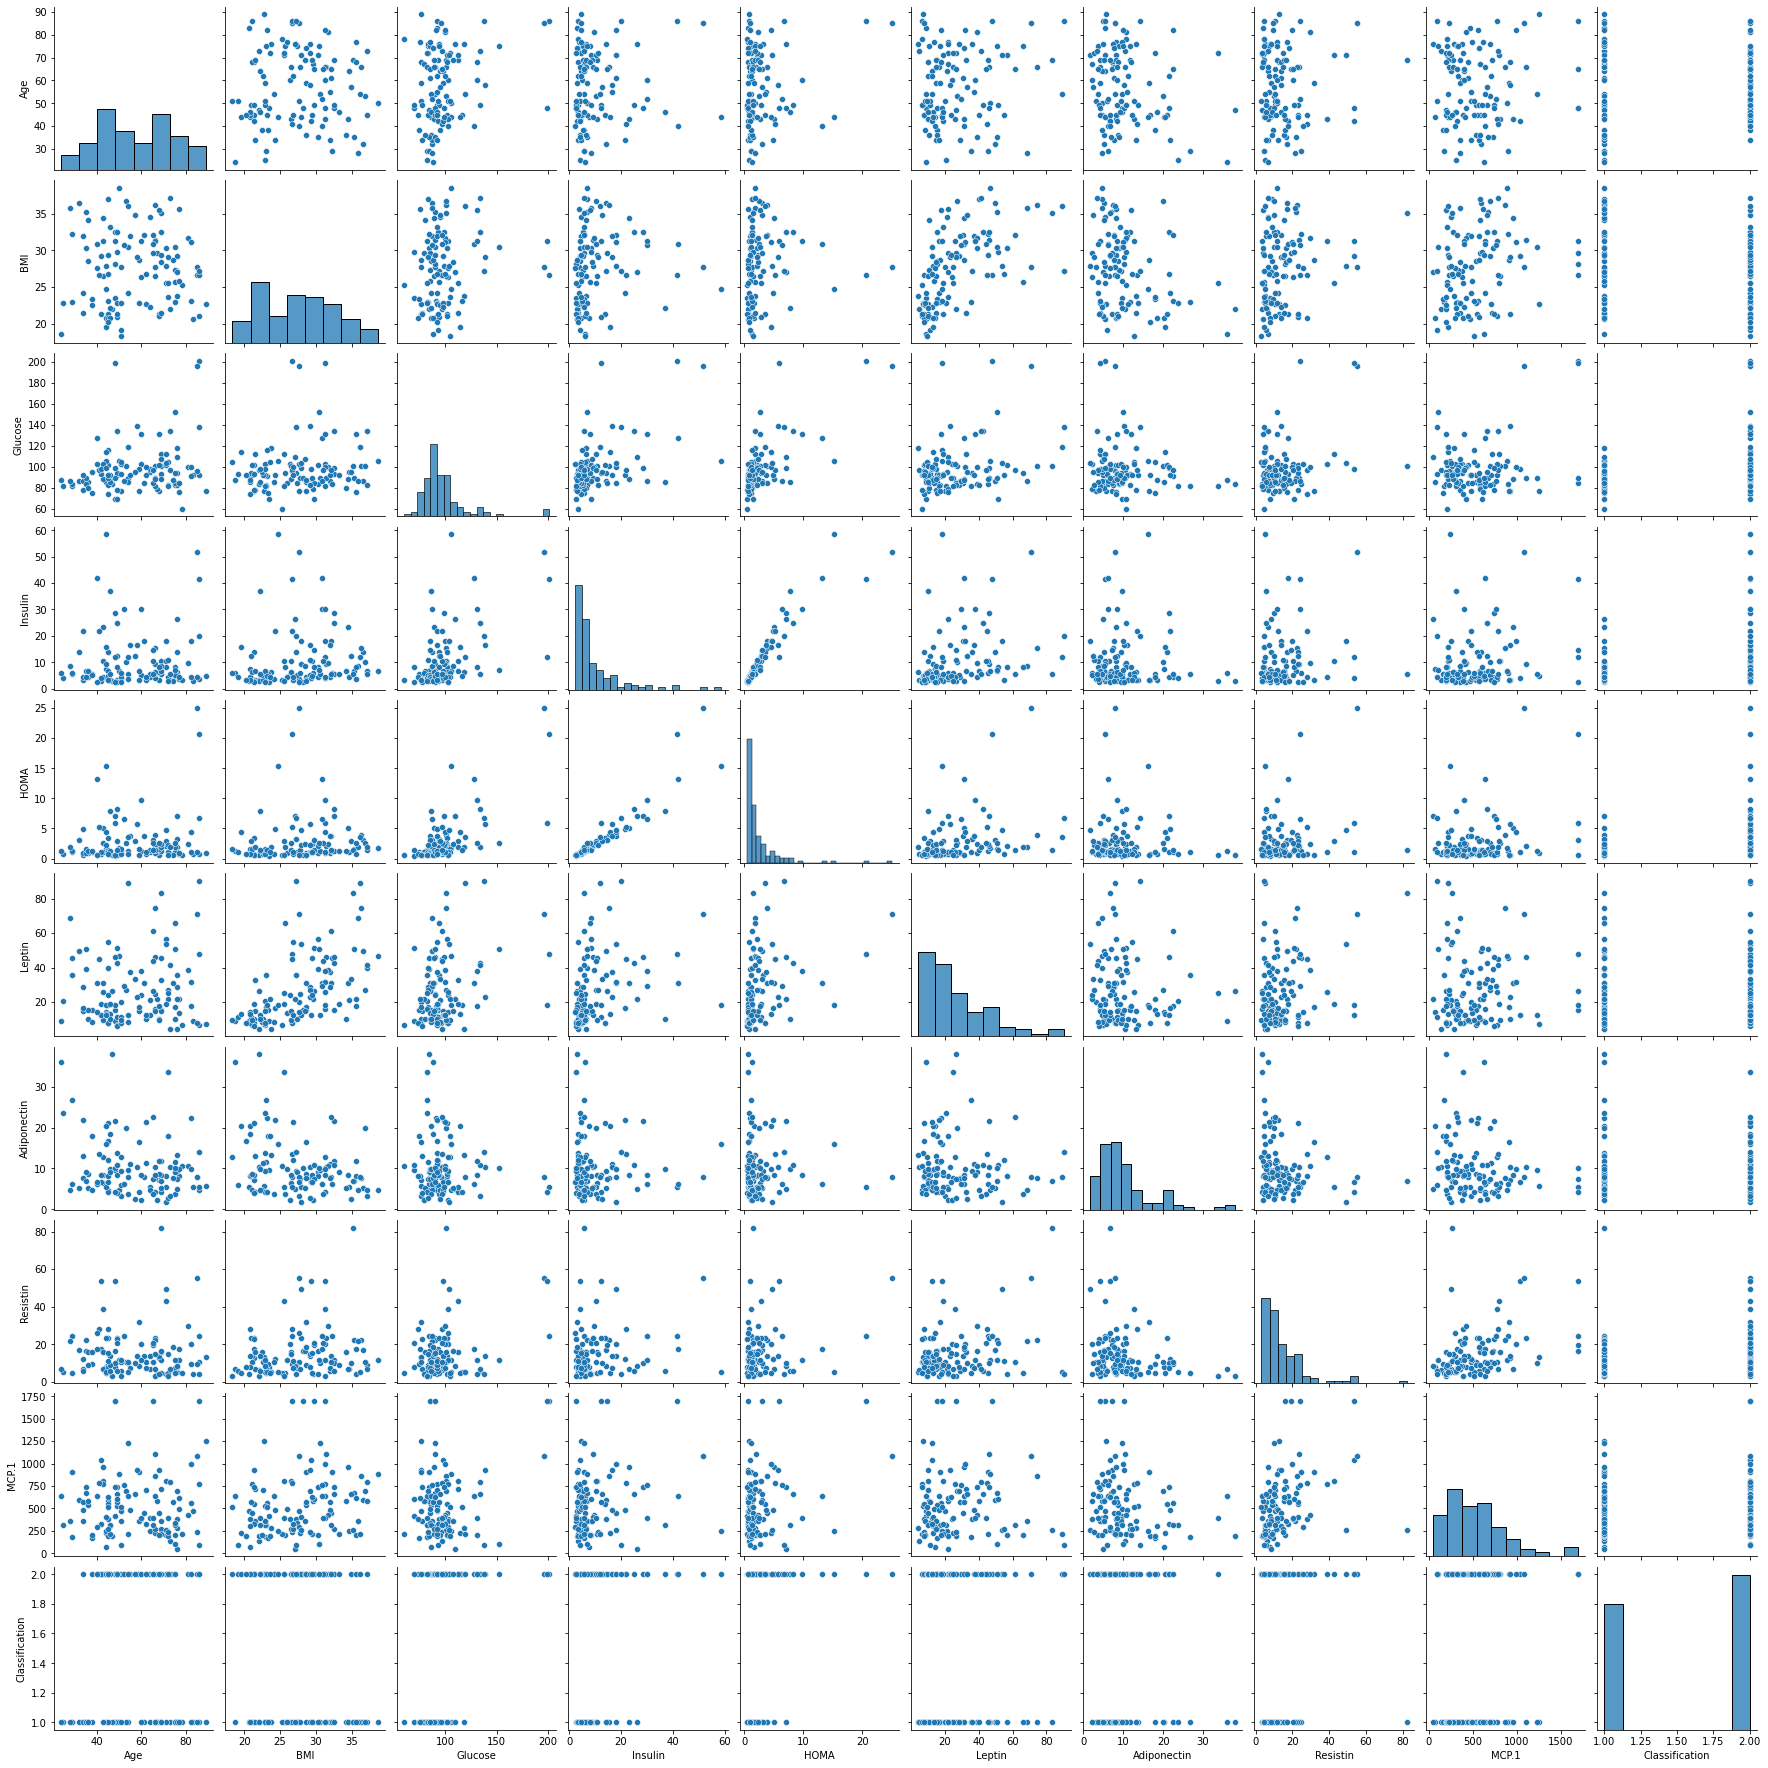

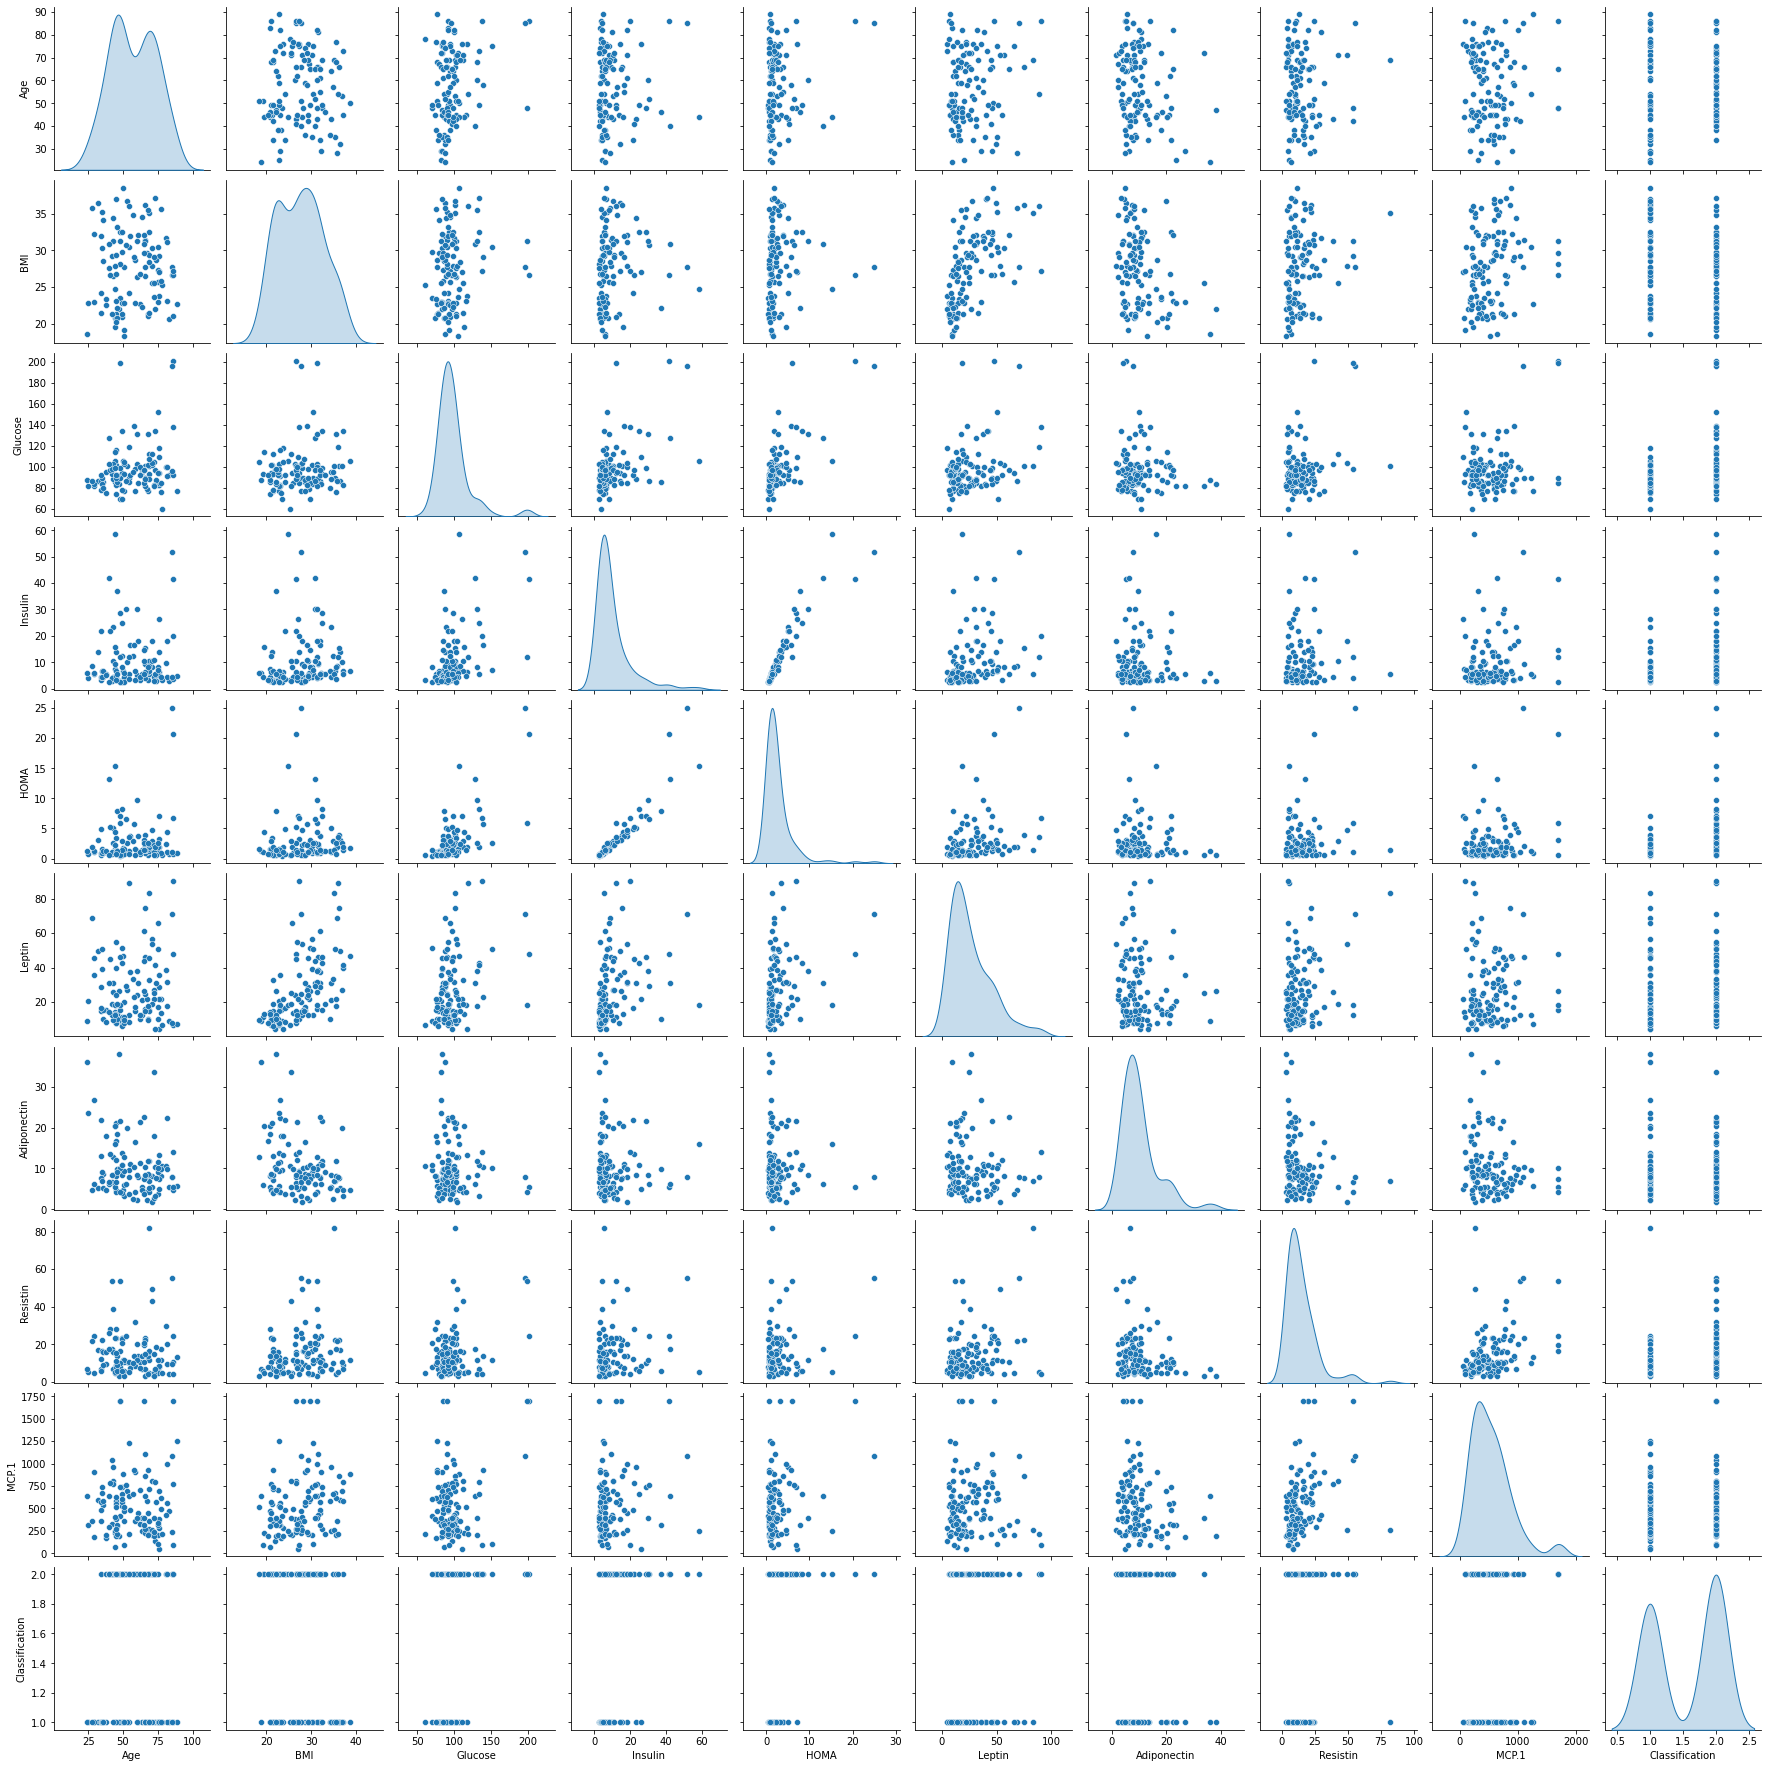

In [3]:
#1. Explore the Breast Cancer Data (10 points)


print("I will perform some exploration of the Breast Cancer data.")

#General Data Frame info
print("\n\nGeneral formating of the data frame:")
print(df.describe())
#Column info
print("\nColumn listing :")
print(df.columns)
#Looking for correlations
corr = df.corr()
print("Correlation Values:\n")
print(corr)
print("\nA correlation plot:")


#plot a correlation matrix
plt.matshow(corr)
plt.title("Correlation Matrix")
plt.colorbar()
plt.xticks(range(10), list(df.columns))
plt.yticks(range(10), list(df.columns))

#Look for relationships in a pair plot
print("\nA pair plot of the data to inspect for correlations:")
sns.pairplot(df)
sns.pairplot(df, diag_kind='kde')


#split the variables and the classifiers
#Column variables
data = df.iloc[:, :9]
#Cancer classification
cancer = df.iloc[:,9]


In [20]:
#2. Build and evaluate SCV models with different kernel function (40 points)

#import the Supoort Vector Machine module
from sklearn import svm

X_train, X_test, y_train, y_test = train_test_split(data,
                                                    cancer,
                                                    test_size=0.3)







#Set the scoring types for the cross_validate
scoring = ['accuracy', 'precision_macro', 'recall_macro']




#Build the SVC with linear kernel
start = time.perf_counter()

svc_linear = svm.SVC(kernel = 'linear')
#CV and metrics
lin_score = cross_validate(svc_linear, X_train, y_train, cv = 10, 
                               scoring = scoring,
                               return_train_score = True)
lin_score_df = pd.DataFrame(lin_score).mean()

end = time.perf_counter()

print("\nThe metrics of the Linear SVC is: " )
print(lin_score_df)
print("time:" + str(end-start))



#Build the SVC with rbf kernel
start = time.perf_counter()

svc_rbf = svm.SVC(kernel = 'rbf')
#CV and metrics
rbf_score = cross_validate(svc_rbf, X_train, y_train, cv = 10, 
                               scoring = scoring,
                               return_train_score = True)
rbf_score_df = pd.DataFrame(rbf_score).mean()

end = time.perf_counter()

print("\nThe metrics of the Radial Basis Function SVC is: " )
print(rbf_score_df)
print("time:" + str(end-start))


#I've played with the split a bit and at 0.25 and higher, I find that the poly
#just finds all patients have cancer... which is from a medical 
#persepctive better than missing it...
#This also causes the interpreter to throw a lot of of warnings.

#Since having zero values for f1 this causes issues within the precision calculations, 
#a ton of warnings appear.  I am suppressing the warnings for clarity in the 
#PDF.

import warnings
warnings.filterwarnings("ignore")

X_train, X_test, y_train, y_test = train_test_split(data,
                                                    cancer,
                                                    test_size=0.25)
#Build the SVC with polynomial kernel
start = time.perf_counter()

#Set up different polynomial degrees
params = [{'degree':[2,3,4]}]
svc_poly = svm.SVC(kernel = 'poly')
#Only scored over F1
svc_poly_cv = GridSearchCV(svc_poly, param_grid = params, cv = 10,
                           scoring = 'precision_macro',
                           return_train_score = True)


#Fit the data
svc_poly_cv.fit(X_train, y_train)
#make prediction
svc_poly_test_pred = svc_poly_cv.predict(X_test)
svc_poly_train_pred = svc_poly_cv.predict(X_train)
#get metrics
#I'm getting the zero_division error which will not turn off
#even when I set the parameter
svc_poly_metrics = classification_report(y_test, svc_poly_test_pred,
                                         zero_division=1)

end = time.perf_counter()

#Get the GridSearchCV results
poly_score_df = pd.DataFrame(svc_poly_cv.cv_results_)
poly_score_results = poly_score_df[['mean_train_score', 
                                    'mean_test_score']]

#insert individual poly degrees into the data frame
poly_score_results.insert(0, 'Degree', [2,3,4])


print("\nThe Scores of the Polynomial SVC are: " + 
      str(svc_poly_metrics))
print("The polynomial used has the following estimators:")
print(str(svc_poly_cv.best_estimator_) + "\n" + str(svc_poly_cv.best_params_))
print("\nResults for all polynomials:")
print(poly_score_results)
print("NOTE: The precision scores of the polynomial SVC came back ill-defined multiple times " + 
      "as all data came back possitive for cancer.  \nThis was the case " +
      "at test_size=0.25.  At lower values there was a split.\n")
print("\nThis can be seen in the confusion matrix:")
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, svc_poly_test_pred))
print("\nI was only able to get what looked like some sort of healthy split once " +
     "and it was only when the poly degree equaled 4.")
print("time:" + str(end-start))

#Build the SVC with sigmoid kernel
start = time.perf_counter()

svc_sig = svm.SVC(kernel = 'sigmoid')
#CV and metrics
sig_score = cross_validate(svc_sig, X_train, y_train, cv = 10, 
                               scoring = scoring,
                               return_train_score = True)

svc_sig.fit(X_train, y_train)

svc_sig_test_pred = svc_sig.predict(X_test)

sig_score_df = pd.DataFrame(sig_score).mean()

end = time.perf_counter()

print("\nThe metrics of the Sigmoid Function SVC is: " )
print(sig_score_df)
print("NOTE: The Sigmoid SVC also came back ill-defined multiple times.\n" + 
     "This is also due to the data all being classified as having cancer.")
print("\nA check for classification also be seen in the confusion matrix:")
print(confusion_matrix(y_test, svc_sig_test_pred))
print("time:" + str(end-start))


The metrics of the Linear SVC is: 
fit_time                 1.209549
score_time               0.002456
test_accuracy            0.763889
train_accuracy           0.839479
test_precision_macro     0.787500
train_precision_macro    0.836431
test_recall_macro        0.760833
train_recall_macro       0.840027
dtype: float64
time:12.149397899999713

The metrics of the Radial Basis Function SVC is: 
fit_time                 0.001802
score_time               0.002101
test_accuracy            0.568056
train_accuracy           0.567903
test_precision_macro     0.284028
train_precision_macro    0.283952
test_recall_macro        0.500000
train_recall_macro       0.500000
dtype: float64
time:0.07035910000013246

The Scores of the Polynomial SVC are:               precision    recall  f1-score   support

           1       0.50      0.07      0.12        15
           2       0.48      0.93      0.63        14

    accuracy                           0.48        29
   macro avg       0.49      0.50


Metrics for the Random Forest at the Best n_estimator value of: 47
              precision    recall  f1-score   support

           1       0.86      0.63      0.73        19
           2       0.67      0.88      0.76        16

    accuracy                           0.74        35
   macro avg       0.76      0.75      0.74        35
weighted avg       0.77      0.74      0.74        35



<Figure size 432x288 with 0 Axes>

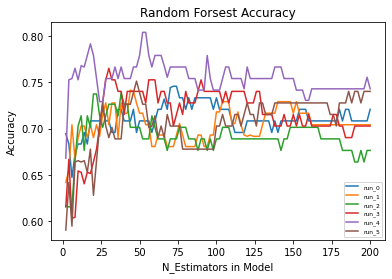

In [5]:
#3. Find the best n_estimator for Random Forests model (25 points)

#Import the random forest module
from sklearn.ensemble import RandomForestClassifier

#empty list to append scores into later


RFdf = pd.DataFrame()

#Use the train test from before as it is outside the loop
runs = range(0,6)

n_estim = range(2,201,2) 

#Loop the number of runs
for j in runs:

    #reset accuracy to an empty list
    accuracy = []
    
    #Reset the train test split
    X_train, X_test, y_train, y_test = train_test_split(data,
                                                        cancer,
                                                        test_size=0.3)
    
    
    #loop over various values of n_estimators
    for i in n_estim:
    
        
        #Build the RFC, set a random state so that you can pin down n_estimators
        RF = RandomForestClassifier(n_estimators = i, random_state = 226)
        
        #Fit and get scores
        RF_scores = cross_val_score(RF, X_train, y_train, cv = 10)
        
        #append score values into accuracy list
        accuracy.append(RF_scores.mean())
    
    #put int the new data frame column
    runname = "run_" + str(j)
    RFdf.insert(j, runname, accuracy)



#create some formating for the plot
s = []
for i in range(2,201,2):
    s.append(i)
#set the index to count by 2's for the plot
RFdf = RFdf.set_index([s])

#plot the Ensemble Accuracy
plt.figure()
RFdf.plot()
plt.title("Random Forsest Accuracy")
plt.ylabel('Accuracy',)
plt.xlabel("N_Estimators in Model")
plt.legend(loc = 4, fontsize = 6)
    

#get the average best value of n
#rather, get the n which hits the maximum at a moment from all of the runs
#and take the mean of those values

#Do not readjust the index since you've don this above
#This value is correct
avg_best_n = (int(RFdf.idxmax().mean()))

#Build the RF objeact
RF_best_est = RandomForestClassifier(n_estimators = avg_best_n)

#Fit the Random Forset
RF_best_est.fit(X_train, y_train)

#Run the prediction on the test data
RF_best_est_pred = RF_best_est.predict(X_test)

RF_best_report = metrics.classification_report(y_test, RF_best_est_pred)

#had to adjust the index to get the right value
print("\nMetrics for the Random Forest at the Best n_estimator value of: " +
      str(avg_best_n))
print(RF_best_report)


Metrics for the AdaBoost at the Best n_estimator value of: 12
              precision    recall  f1-score   support

           1       0.50      0.71      0.59        14
           2       0.73      0.52      0.61        21

    accuracy                           0.60        35
   macro avg       0.62      0.62      0.60        35
weighted avg       0.64      0.60      0.60        35



<Figure size 432x288 with 0 Axes>

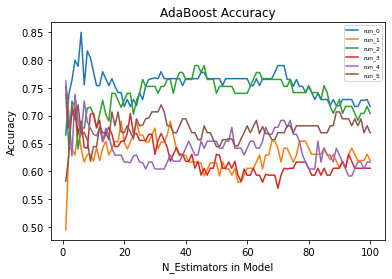

In [6]:
#4. Find the best n_estimatro for Adaboost model (25 points)

#Import AdaBoost Classifier
from sklearn.ensemble import AdaBoostClassifier


ada_df = pd.DataFrame()



#make a smaller step size for adaboost
ada_n_estim = range(1,101,1)

#Loop for 10 runs
for j in runs:
    

    #empty list to append to for later
    ada_accuracy = []

    #Reset the train test split
    X_train, X_test, y_train, y_test = train_test_split(data,
                                                        cancer,
                                                        test_size=0.3)
    
    
    #loop over the count of n_estimators 0 - 200 by 2 from above
    for i in ada_n_estim:
        
        #build teh adaboost object, modify learning rate, maybe use a grid?
        ada = AdaBoostClassifier(n_estimators = i, learning_rate = 1,
                                 random_state=226)
        
        #run the CV on the AdaBoost classifier and get scores
        ada_score = cross_val_score(ada, X_train, y_train, cv = 10)
        
        #put scores for each n_estimator into the ada_accuacy
        ada_accuracy.append(ada_score.mean())
        
    #put int the new data frame column
    runname = "run_" + str(j)
    ada_df.insert(j, runname, ada_accuracy)
    
    
#create some formating for the plot
s = []
for i in range(1,101,1):
    s.append(i)
#set the index to count by 2's for the plot
ada_df = ada_df.set_index([s])

#plot the Ensemble Accuracy
plt.figure()
ada_df.plot()
plt.title("AdaBoost Accuracy")
plt.ylabel('Accuracy',)
plt.xlabel("N_Estimators in Model")  
plt.legend(loc = 1, fontsize = 6)



#don't reindex this
avg_best_ada_n = int(ada_df.idxmax().mean())

#run the adaBoost with the best_average_n_estimator
ada_best_est = AdaBoostClassifier(n_estimators=avg_best_ada_n, 
                                  learning_rate = 0.005)

#fit
ada_best_est.fit(X_train, y_train)

#predict
ada_best_est_pred = ada_best_est.predict(X_test)

#metrics
ada_best_report = metrics.classification_report(y_test, ada_best_est_pred)

#Had to add one since the ada n_estimators  run from 1 - 100
print("\nMetrics for the AdaBoost at the Best n_estimator value of: " +
      str(avg_best_ada_n))
print(ada_best_report)


In [7]:
#For both the random forest ensemble and the AdaBoost models I conduced
#five trials of train-test splits where I increased the n_estimators param.

#I then found the maximum n_estimator of each of these 5 trials and
#averaged them together to find the avg best n_estimator

#This average best n_estimator is what I used for a final fit and prediction
#to provide the classification_report metric.